In [2]:
# Import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [29]:
# import the iris dataset from seaborn
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
# check unique species
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [38]:
# drop rows with class label 'setosa'
iris = iris[iris['species'] != 'versicolor']

In [39]:
# split the data into features and target
X = iris.drop('species', axis=1)
y = iris['species']

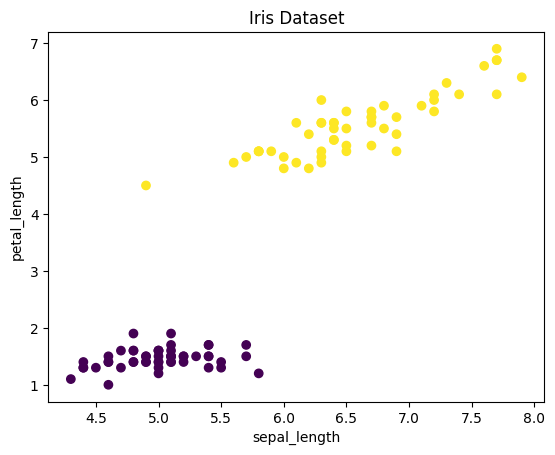

In [40]:
y_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
y_changed = y.map(y_map)

# Plot the dataset
plt.scatter(X['sepal_length'], X['petal_length'], c=y_changed, cmap='viridis')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Iris Dataset')
plt.show()

In [41]:
# Create a logistic regression model
log_reg = LogisticRegression()

# Fit the model to the data
log_reg.fit(X, y)

# Print the coefficients
print('Intercept:', log_reg.intercept_)
print('Coefficients:', log_reg.coef_)

Intercept: [-8.76905997]
Coefficients: [[ 0.48498493 -0.34086327  1.8278232   0.83365156]]


In [42]:
# model accuracy
print('Model Accuracy:', log_reg.score(X, y))

Model Accuracy: 1.0


In [ ]:
# Plot the decision boundary
x_min, x_max = X['sepal_length'].min() - 0.5, X['sepal_length'].max() + 0.5
y_min, y_max = X['petal_length'].min() - 0.5, X['petal_length'].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = log_reg.predict(np.c_[X.values.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5, cmap='rainbow')
plt.scatter(X['sepal_length'], X['petal_length'], c=y_changed, cmap='rainbow', edgecolors='black')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Decision Boundary')
plt.show()